<a href="https://colab.research.google.com/github/Jyothishhebbar/Speech-Emotion-Recognition/blob/main/Speech_Emotion.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas as pd
import numpy as np
import os
import seaborn as sns
import matplotlib.pyplot as plt
import librosa
import librosa.display
from IPython.display import Audio
import warnings
warnings.filterwarnings('ignore')

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
paths = []
labels = []
for dirname, _, filenames in os.walk('/content/drive/MyDrive/archive'):
    for filename in filenames:
        paths.append(os.path.join(dirname, filename))
        label = filename.split('_')[-1]
        label = label.split('.')[0]
        labels.append(label.lower())
    if len(paths) == 2800:
        break
print('Dataset is Loaded')

Dataset is Loaded


In [ ]:
len(paths)

2800

In [ ]:
paths[:5]

['/content/drive/MyDrive/archive/TESS Toronto emotional speech set data/YAF_disgust/YAF_bought_disgust.wav',
 '/content/drive/MyDrive/archive/TESS Toronto emotional speech set data/YAF_disgust/YAF_boat_disgust.wav',
 '/content/drive/MyDrive/archive/TESS Toronto emotional speech set data/YAF_disgust/YAF_base_disgust.wav',
 '/content/drive/MyDrive/archive/TESS Toronto emotional speech set data/YAF_disgust/YAF_bath_disgust.wav',
 '/content/drive/MyDrive/archive/TESS Toronto emotional speech set data/YAF_disgust/YAF_bite_disgust.wav']

In [ ]:
labels[:5]

['disgust', 'disgust', 'disgust', 'disgust', 'disgust']

In [ ]:
## Create a dataframe
df = pd.DataFrame()
df['speech'] = paths
df['label'] = labels
df.head()

,speech,label
0,/content/drive/MyDrive/archive/TESS Toronto em...,disgust
1,/content/drive/MyDrive/archive/TESS Toronto em...,disgust
2,/content/drive/MyDrive/archive/TESS Toronto em...,disgust
3,/content/drive/MyDrive/archive/TESS Toronto em...,disgust
4,/content/drive/MyDrive/archive/TESS Toronto em...,disgust


In [ ]:
df['label'].value_counts()

,count
label,
ps,600
sad,600
disgust,400
angry,400
neutral,400
happy,200
fear,200


Exploratory Data Analysis

<Axes: xlabel='label', ylabel='count'>

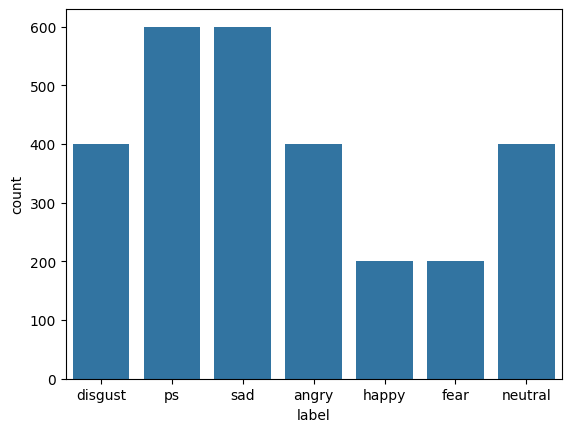

In [ ]:
sns.countplot(data=df, x='label')

In [ ]:
def waveplot(data, sr, emotion):
    plt.figure(figsize=(10,4))
    plt.title(emotion, size=20)
    librosa.display.waveshow(data, sr=sr)
    plt.show()

def spectogram(data, sr, emotion):
    x = librosa.stft(data)
    xdb = librosa.amplitude_to_db(abs(x))
    plt.figure(figsize=(11,4))
    plt.title(emotion, size=20)
    librosa.display.specshow(xdb, sr=sr, x_axis='time', y_axis='hz')
    plt.colorbar()

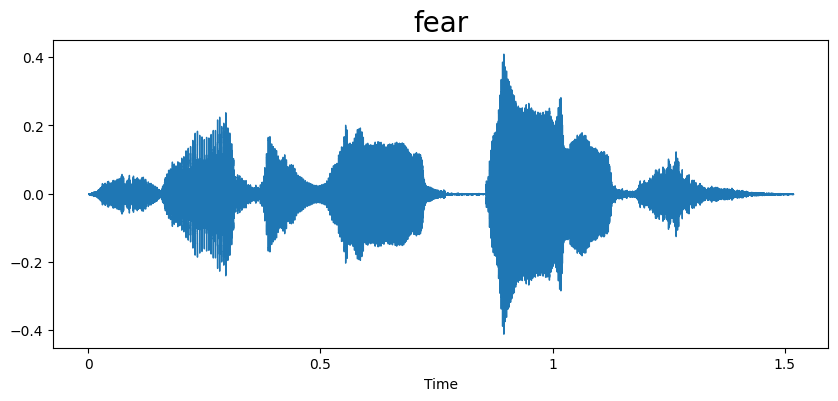

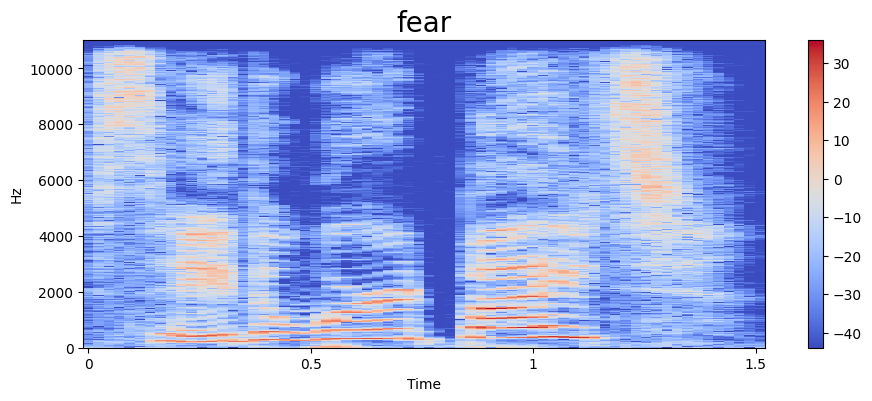

In [ ]:
emotion = 'fear'
path = np.array(df['speech'][df['label']==emotion])[0]
data, sampling_rate = librosa.load(path)
waveplot(data, sampling_rate, emotion)
spectogram(data, sampling_rate, emotion)
Audio(path)

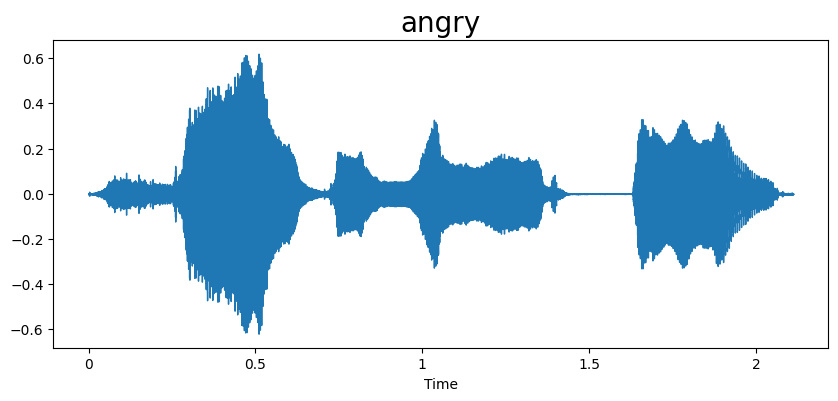

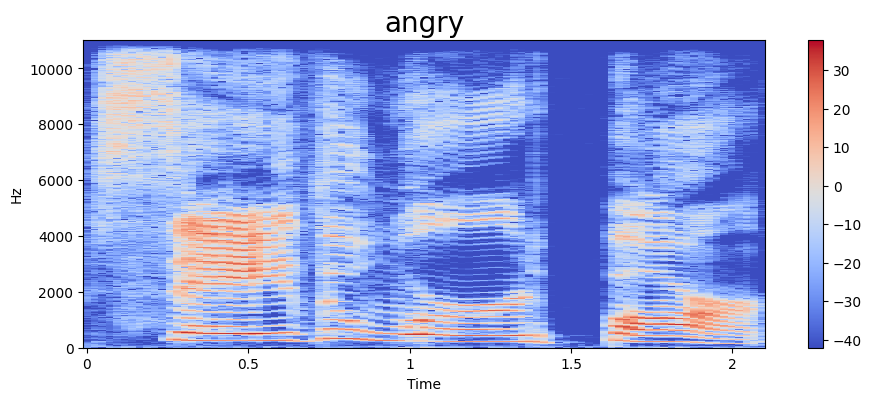

In [ ]:
emotion = 'angry'
path = np.array(df['speech'][df['label']==emotion])[1]
data, sampling_rate = librosa.load(path)
waveplot(data, sampling_rate, emotion)
spectogram(data, sampling_rate, emotion)
Audio(path)

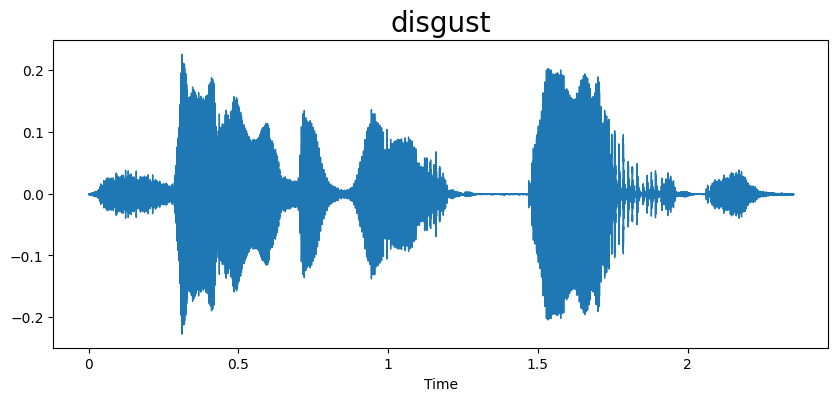

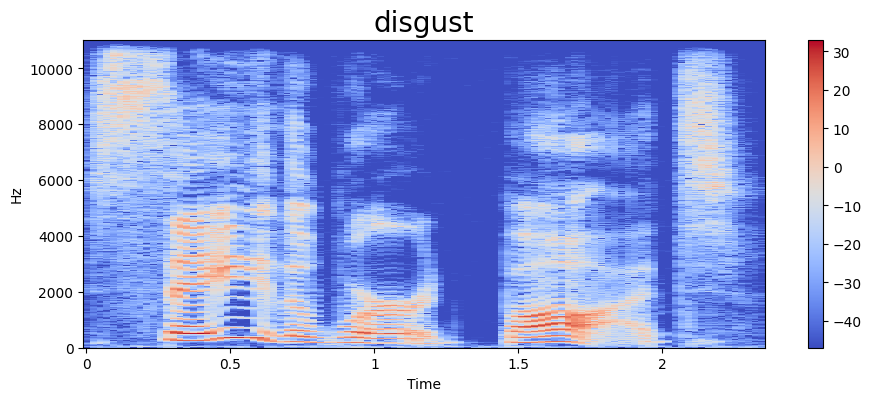

In [ ]:
emotion = 'disgust'
path = np.array(df['speech'][df['label']==emotion])[0]
data, sampling_rate = librosa.load(path)
waveplot(data, sampling_rate, emotion)
spectogram(data, sampling_rate, emotion)
Audio(path)

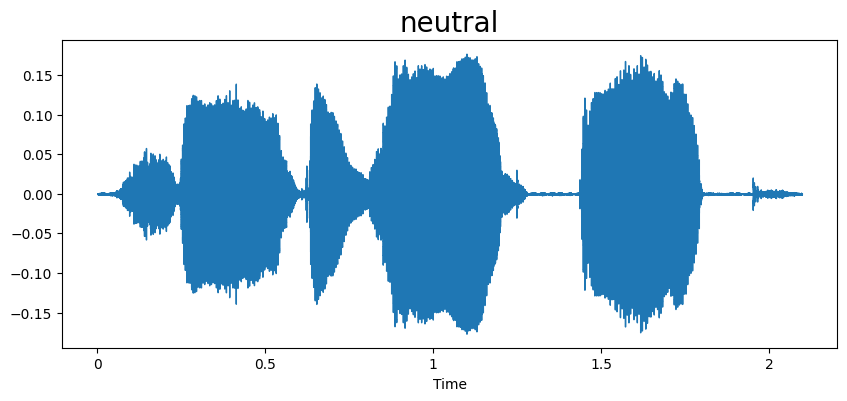

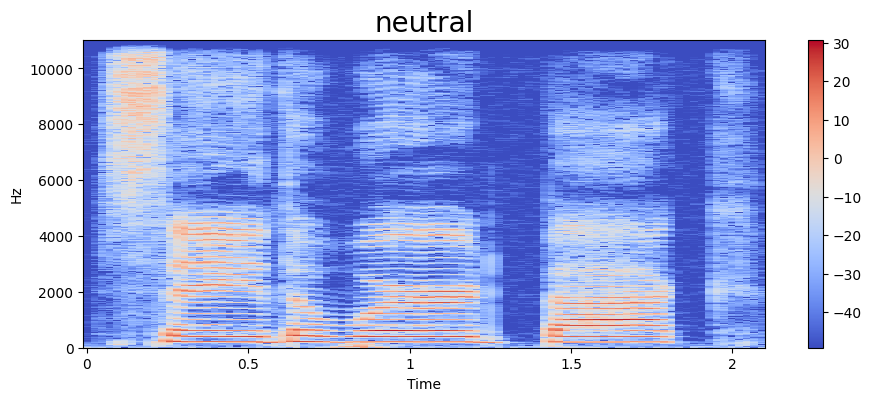

In [ ]:
emotion = 'neutral'
path = np.array(df['speech'][df['label']==emotion])[0]
data, sampling_rate = librosa.load(path)
waveplot(data, sampling_rate, emotion)
spectogram(data, sampling_rate, emotion)
Audio(path)

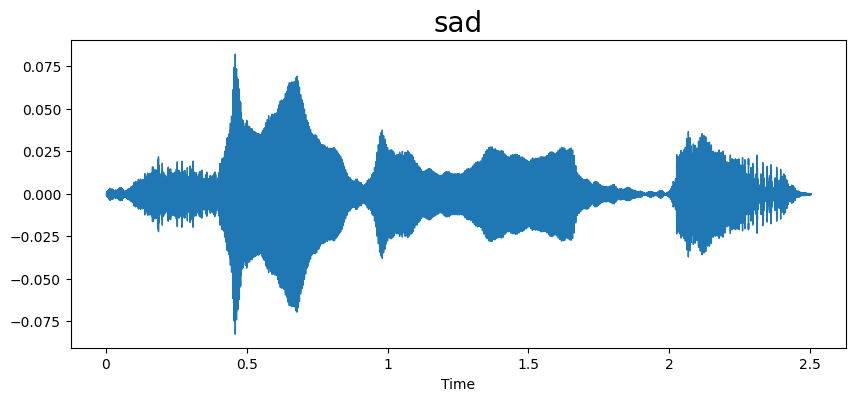

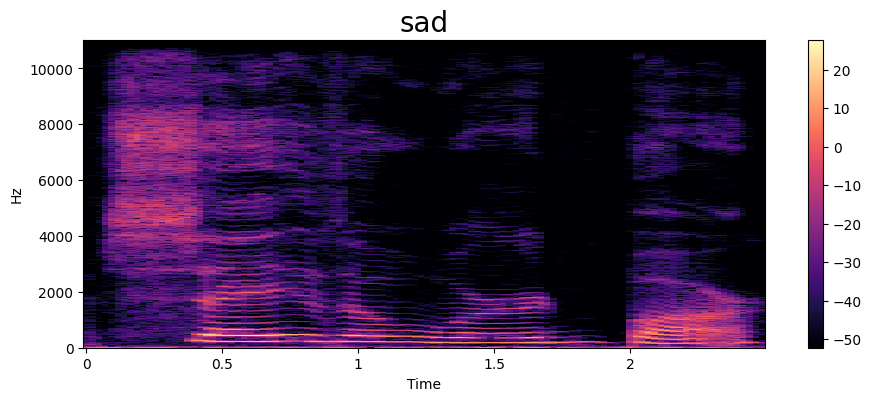

In [ ]:
emotion = 'sad'
path = np.array(df['speech'][df['label']==emotion])[0]
data, sampling_rate = librosa.load(path)
waveplot(data, sampling_rate, emotion)
spectogram(data, sampling_rate, emotion)
Audio(path)

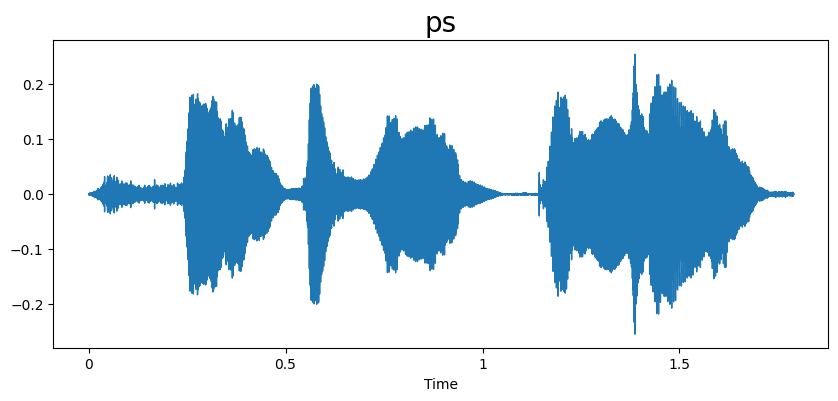

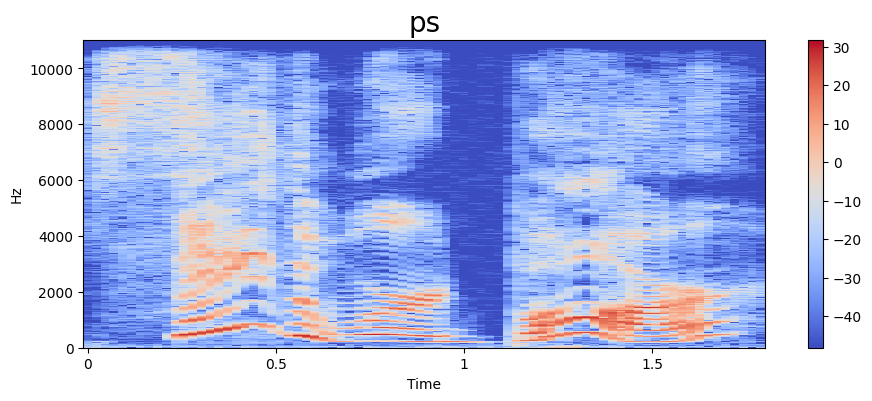

In [ ]:
emotion = 'ps'
path = np.array(df['speech'][df['label']==emotion])[0]
data, sampling_rate = librosa.load(path)
waveplot(data, sampling_rate, emotion)
spectogram(data, sampling_rate, emotion)
Audio(path)

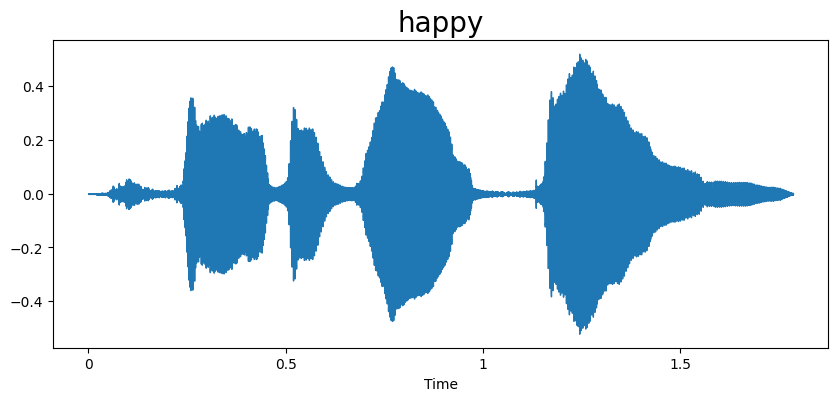

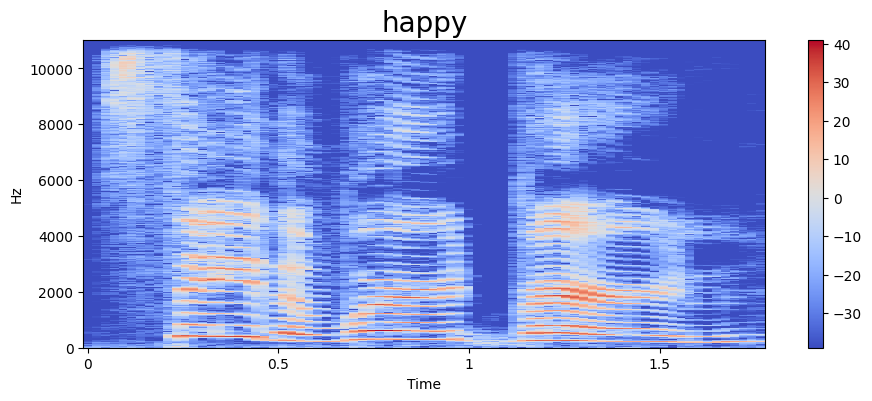

In [ ]:
emotion = 'happy'
path = np.array(df['speech'][df['label']==emotion])[0]
data, sampling_rate = librosa.load(path)
waveplot(data, sampling_rate, emotion)
spectogram(data, sampling_rate, emotion)
Audio(path)

Feature Extraction


In [ ]:
def extract_mfcc(filename):
    y, sr = librosa.load(filename, duration=3, offset=0.5)
    mfcc = np.mean(librosa.feature.mfcc(y=y, sr=sr, n_mfcc=40).T, axis=0)
    return mfcc

In [ ]:
extract_mfcc(df['speech'][0])

array([-4.00324585e+02,  8.97419205e+01, -8.08458138e+00,  6.02562809e+00,
       -1.86087837e+01,  3.61579704e+00, -6.09347630e+00, -8.76116753e+00,
       -1.08064680e+01,  2.55455971e+00, -1.05493374e+01,  4.64427090e+00,
       -1.14301605e+01,  2.66451788e+00, -5.00547123e+00, -6.21576595e+00,
       -4.65954691e-01, -7.81752348e-01, -2.00960684e+00, -3.22342992e+00,
        6.68003678e-01, -6.23867464e+00, -2.50648928e+00,  2.64598322e+00,
       -5.62122631e+00,  5.47389150e-01, -2.82516360e+00, -2.68562675e-01,
       -3.75910616e+00,  2.56482434e+00, -7.63411522e-01,  4.21327877e+00,
        1.67257559e+00,  5.49680090e+00,  6.62167501e+00,  7.40915680e+00,
        6.43634653e+00,  5.90814495e+00,  2.99805713e+00,  7.06079865e+00],
      dtype=float32)

In [ ]:
X_mfcc = df['speech'].apply(lambda x: extract_mfcc(x))

In [ ]:
X_mfcc

,speech
0,"[-400.3246, 89.74192, -8.084581, 6.025628, -18..."
1,"[-420.64407, 97.25092, -0.5822761, 17.940107, ..."
2,"[-443.2494, 64.684074, 13.261546, 25.564043, -..."
3,"[-409.6209, 105.88283, -21.932735, 8.138542, -..."
4,"[-412.17133, 80.672745, -3.158254, 23.655542, ..."
...,...
2795,"[-514.5419, 113.77745, 20.301258, -11.996498, ..."
2796,"[-518.1542, 99.512314, 26.834148, 5.224762, 13..."
2797,"[-526.00586, 89.40896, 14.089753, 7.2351203, 1..."
2798,"[-516.1739, 118.052666, 20.563543, -10.627628,..."


In [ ]:
X = [x for x in X_mfcc]
X = np.array(X)
X.shape

(2800, 40)

In [ ]:
## input split
X = np.expand_dims(X, -1)
X.shape

(2800, 40, 1)

In [ ]:
from sklearn.preprocessing import OneHotEncoder
enc = OneHotEncoder()
y = enc.fit_transform(df[['label']])

In [ ]:
y = y.toarray()

In [ ]:
y.shape

(2800, 7)

Create the LSTM Model

In [ ]:
from keras.models import Sequential
from keras.layers import Dense, LSTM, Dropout

model = Sequential([
    LSTM(256, return_sequences=False, input_shape=(40,1)),
    Dropout(0.2),
    Dense(128, activation='relu'),
    Dropout(0.2),
    Dense(64, activation='relu'),
    Dropout(0.2),
    Dense(7, activation='softmax')
])

model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])
model.summary()

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ lstm (LSTM)                          │ (None, 256)                 │         264,192 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout (Dropout)                    │ (None, 256)                 │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense (Dense)                        │ (None, 128)                 │          32,896 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_1 (Dropout)                  │ (None, 128)                 │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_1 (Dense)                      │ (None, 64)                  │           8,256 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_2 (Dropout)                  │ (None, 64)                  │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_2 (Dense)                      │ (None, 7)                   │             455 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 305,799 (1.17 MB)

 Trainable params: 305,799 (1.17 MB)

 Non-trainable params: 0 (0.00 B)

In [ ]:
# Train the model
history = model.fit(X, y, validation_split=0.2, epochs=50, batch_size=64)

Epoch 1/50
35/35 ━━━━━━━━━━━━━━━━━━━━ 12s 260ms/step - accuracy: 0.3614 - loss: 1.5598 - val_accuracy: 0.7732 - val_loss: 1.0443
Epoch 2/50
35/35 ━━━━━━━━━━━━━━━━━━━━ 6s 182ms/step - accuracy: 0.8677 - loss: 0.4083 - val_accuracy: 0.9125 - val_loss: 0.2970
Epoch 3/50
35/35 ━━━━━━━━━━━━━━━━━━━━ 9s 253ms/step - accuracy: 0.9528 - loss: 0.1460 - val_accuracy: 0.8875 - val_loss: 0.3689
Epoch 4/50
35/35 ━━━━━━━━━━━━━━━━━━━━ 8s 179ms/step - accuracy: 0.9683 - loss: 0.1044 - val_accuracy: 0.8750 - val_loss: 0.5466
Epoch 5/50
35/35 ━━━━━━━━━━━━━━━━━━━━ 11s 196ms/step - accuracy: 0.9650 - loss: 0.1198 - val_accuracy: 0.8589 - val_loss: 0.5689
Epoch 6/50
35/35 ━━━━━━━━━━━━━━━━━━━━ 8s 243ms/step - accuracy: 0.9854 - loss: 0.0488 - val_accuracy: 0.8839 - val_loss: 0.5556
Epoch 7/50
35/35 ━━━━━━━━━━━━━━━━━━━━ 8s 179ms/step - accuracy: 0.9774 - loss: 0.0700 - val_accuracy: 0.9018 - val_loss: 0.3471
Epoch 8/50
35/35 ━━━━━━━━━━━━━━━━━━━━ 14s 286ms/step - accuracy: 0.9896 - loss: 0.0359 - val_accuracy:

PLot the results

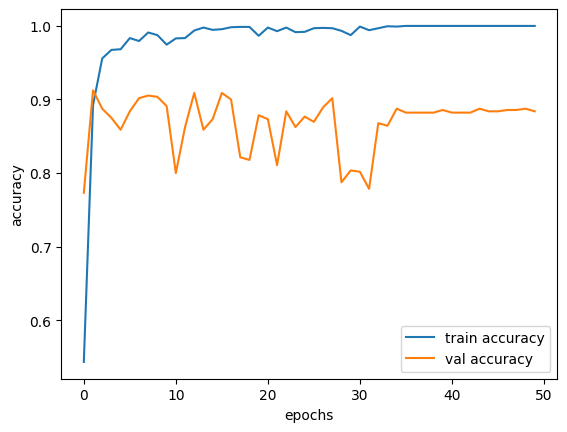

In [ ]:
epochs = list(range(50))
acc = history.history['accuracy']
val_acc = history.history['val_accuracy']

plt.plot(epochs, acc, label='train accuracy')
plt.plot(epochs, val_acc, label='val accuracy')
plt.xlabel('epochs')
plt.ylabel('accuracy')
plt.legend()
plt.show()

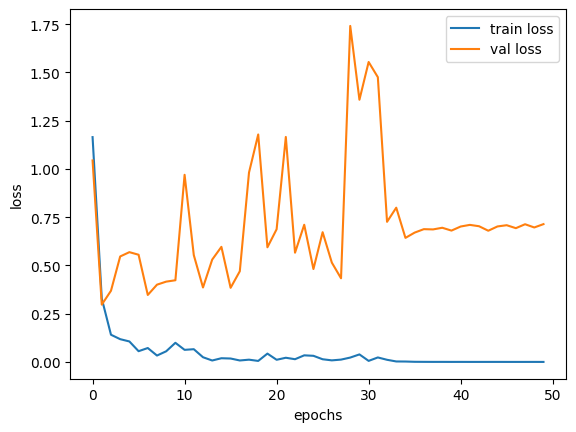

In [ ]:
loss = history.history['loss']
val_loss = history.history['val_loss']

plt.plot(epochs, loss, label='train loss')
plt.plot(epochs, val_loss, label='val loss')
plt.xlabel('epochs')
plt.ylabel('loss')
plt.legend()
plt.show()